In [ ]:
#Grab Data
import yfinance as yf

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
#USD/EUR price levels for the past 4 years (1-10yrs work)
symbol = 'CNY=X'
raw = yf.download(symbol, start="2020-01-01", end="2024-02-28")['Adj Close']

data = pd.DataFrame(raw)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head()

,Adj Close
Date,
2020-01-01,6.9623
2020-01-02,6.9622
2020-01-03,6.9634
2020-01-06,6.9645
2020-01-07,6.9745


In [ ]:
#Calculate the returns and add it to the DataFrame
data['return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

#When the market direction is greater than 0 --> classify 1, less than 0 --> 0
data['direction'] = np.where(data['return'] > 0, 1, 0)

data.head()

,Adj Close,return,direction
Date,,,
2020-01-01,6.9623,NaN,0
2020-01-02,6.9622,-0.000014,0
2020-01-03,6.9634,0.000172,1
2020-01-06,6.9645,0.000158,1
2020-01-07,6.9745,0.001435,1


In [ ]:
#Create 10 columns instead of 5 columns for each lag representing previous day's return, better for reviewing and more accurate direction (up for review pending PCA)
lags = 10

cols = []
for lag in range(1, lags + 1):
  col = f'lag_{lag}'
  data[col] = data['return'].shift(lag)
  cols.append(col)

data.dropna(inplace=True)

In [ ]:
data.round(6).tail()

,Adj Close,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,,,
2024-02-21,7.1897,-0.001043,0,0.010981,-0.006343,-0.001674,-0.001782,-0.000487,0.001837,0.010080,0.000830,0.000141,-0.001182
2024-02-22,7.1881,-0.000223,0,-0.001043,0.010981,-0.006343,-0.001674,-0.001782,-0.000487,0.001837,0.010080,0.000830,0.000141
2024-02-23,7.1933,0.000723,1,-0.000223,-0.001043,0.010981,-0.006343,-0.001674,-0.001782,-0.000487,0.001837,0.010080,0.000830
2024-02-26,7.1944,0.000153,1,0.000723,-0.000223,-0.001043,0.010981,-0.006343,-0.001674,-0.001782,-0.000487,0.001837,0.010080
2024-02-27,7.1963,0.000264,1,0.000153,0.000723,-0.000223,-0.001043,0.010981,-0.006343,-0.001674,-0.001782,-0.000487,0.001837


# Deep Neural Network - Tensorflow

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
import random

In [ ]:
optimizer = Adam(learning_rate=0.004)

def set_seeds(seed=100):
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(100)

In [ ]:
set_seeds()
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(lags,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_set, test_set = np.split(data, [int(.80 *len(data))])

In [ ]:
mu, std = train_set.mean(), train_set.std()

In [ ]:
# Normalizes the features data by Gaussian normalization, most basic normalization/standard
training_data_ = (train_set - mu) / std
test_data_ = (test_set - mu) / std

In [ ]:
%%time
model.fit(train_set[cols],
           train_set['direction'],
           epochs=100, verbose=False,
           validation_split=0.2, shuffle=False)

CPU times: user 13.7 s, sys: 604 ms, total: 14.3 s
Wall time: 25.5 s


In [ ]:
res = pd.DataFrame(model.history.history)

<Axes: >

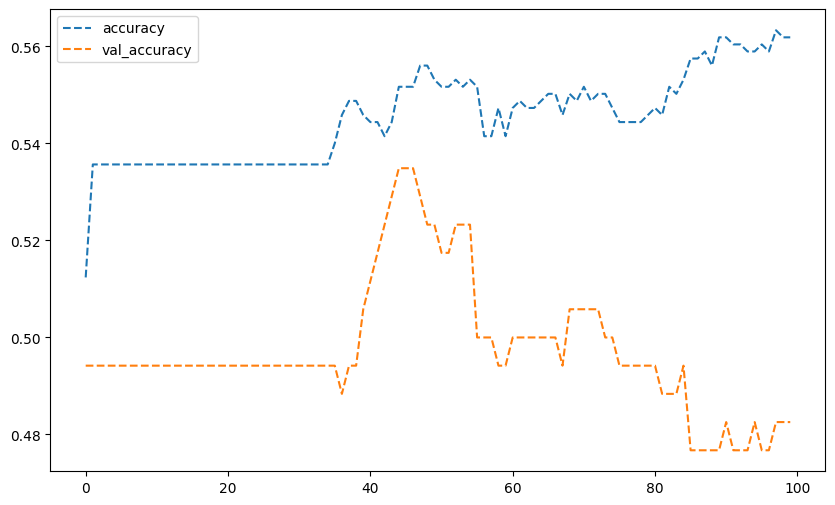

In [ ]:
# Accuracy of the model for training and validation in the training set
res[['accuracy', 'val_accuracy']].plot(figsize=(10,6), style='--')

In [ ]:
model.evaluate(training_data_[cols], train_set['direction'])

27/27 [==============================] - 0s 3ms/step - loss: 10.6931 - accuracy: 0.5588


[10.69314193725586, 0.5587893128395081]

In [ ]:
# Prediction of market direction
pred = np.where(model.predict(training_data_[cols]) > 0.5, 1, 0)

27/27 [==============================] - 0s 3ms/step


In [ ]:
pred

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
pred[:30].flatten()

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
# Transforming the predictions to long-short position; 1,-1
train_set['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
# Calculate strategy returns given the positions
train_set['strategy'] = (train_set['prediction'] * train_set['return'])

In [ ]:
train_set[['return', 'strategy']].sum().apply(np.exp)

return      1.001551
strategy    1.181239
dtype: float64

<Axes: xlabel='Date'>

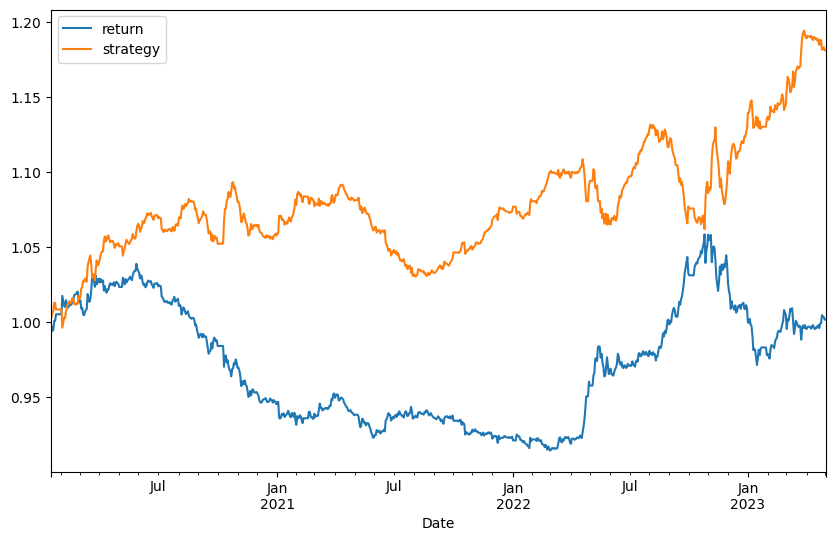

In [ ]:
# Plots the strategy returns to the benchmark performance for the sample
train_set[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

# Out-of-Sample Test Set

In [ ]:
model.evaluate(test_data_[cols], test_set['direction'])

7/7 [==============================] - 0s 4ms/step - loss: 26.7340 - accuracy: 0.5070


[26.734006881713867, 0.5069767236709595]

In [ ]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0)

7/7 [==============================] - 0s 3ms/step


In [ ]:
test_set['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
test_set['prediction'].value_counts()

prediction
-1    116
 1     99
Name: count, dtype: int64

In [ ]:
test_set['strategy'] = (test_set['prediction'] * test_set['return'])

In [ ]:
test_set[['return', 'strategy']].sum().apply(np.exp)

return      1.041282
strategy    1.097220
dtype: float64

<Axes: xlabel='Date'>

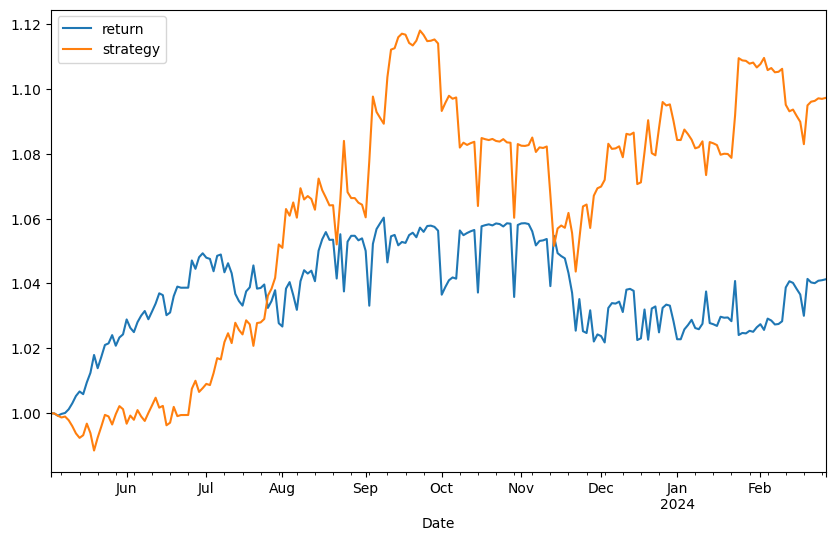

In [ ]:
test_set[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

# Adding More Features

In [ ]:
#Added momentum, volatitlity, & distance to the data_frame
data['momentum'] = data['return'].rolling(5).mean().shift(1)
data['volatility'] = data['return'].rolling(20).std().shift(1)
data['distance'] = (data['Adj Close'] - data['Adj Close'].rolling(50).mean()).shift(1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
cols.extend(['momentum', 'volatility', 'distance'])

In [ ]:
# New DataFrame
data.round(4).tail()

,Adj Close,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,momentum,volatility,distance
Date,,,,,,,,,,,,,,,,
2024-02-21,7.1897,-0.0010,0,0.0110,-0.0063,-0.0017,-0.0018,-0.0005,0.0018,0.0101,0.0008,0.0001,-0.0012,0.0001,0.0054,0.0804
2024-02-22,7.1881,-0.0002,0,-0.0010,0.0110,-0.0063,-0.0017,-0.0018,-0.0005,0.0018,0.0101,0.0008,0.0001,0.0000,0.0038,0.0726
2024-02-23,7.1933,0.0007,1,-0.0002,-0.0010,0.0110,-0.0063,-0.0017,-0.0018,-0.0005,0.0018,0.0101,0.0008,0.0003,0.0039,0.0706
2024-02-26,7.1944,0.0002,1,0.0007,-0.0002,-0.0010,0.0110,-0.0063,-0.0017,-0.0018,-0.0005,0.0018,0.0101,0.0008,0.0038,0.0733
2024-02-27,7.1963,0.0003,1,0.0002,0.0007,-0.0002,-0.0010,0.0110,-0.0063,-0.0017,-0.0018,-0.0005,0.0018,0.0021,0.0039,0.0719


In [ ]:
# Refit and train/test
train_data, test_data = np.split(data, [int(.80 *len(data))])
mu, std = train_data.mean(), train_data.std()

In [ ]:
training_data_ = (train_data - mu) / std
test_data_ = (test_data - mu) / std

In [ ]:
# Updated Dense Layers to 32
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
%%time
model.fit(train_set[cols],
           train_set['direction'],
           epochs=100, verbose=False,
           validation_split=0.2, shuffle=False)


KeyError: "['momentum', 'volatility', 'distance'] not in index"

In [ ]:
model.evaluate(training_data_[cols], train_data['direction'])

26/26 [==============================] - 0s 4ms/step - loss: 0.7364 - accuracy: 0.4884


[0.7363682389259338, 0.48840048909187317]

In [ ]:
pred = np.where(model.predict(training_data_[cols]) > 0.5, 1, 0)

26/26 [==============================] - 0s 4ms/step


In [ ]:
train_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
train_data['strategy'] = (train_data['prediction'] * train_data['return'])

In [ ]:
train_data[['return', 'strategy']].sum().apply(np.exp)

return      0.984367
strategy    0.996708
dtype: float64

<Axes: xlabel='Date'>

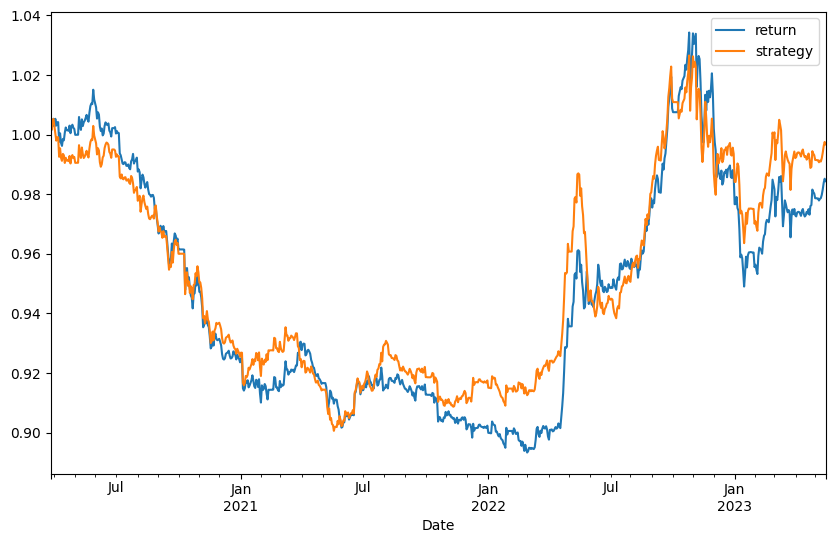

In [ ]:
train_data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

Additional features = better results

## Test Set Prediction

In [ ]:
model.evaluate(test_data_[cols], test_data['direction'])

7/7 [==============================] - 0s 6ms/step - loss: 0.7915 - accuracy: 0.5463


[0.7915343642234802, 0.5463414788246155]

In [ ]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0)

7/7 [==============================] - 0s 3ms/step


In [ ]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
test_set['prediction'].value_counts()

prediction
-1    116
 1     99
Name: count, dtype: int64

In [ ]:
test_set['strategy'] = (test_set['prediction'] * test_set['return'])

In [ ]:
test_set[['return', 'strategy']].sum().apply(np.exp)

return      1.041282
strategy    1.097220
dtype: float64

<Axes: xlabel='Date'>

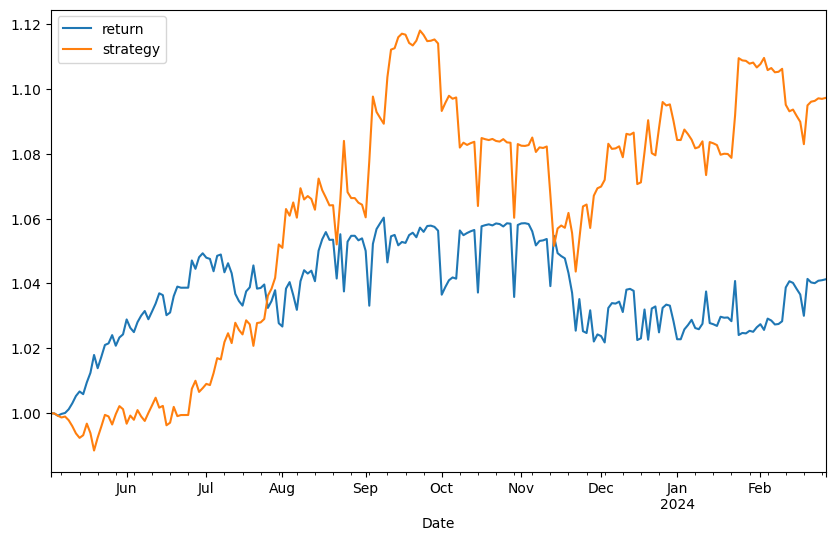

In [ ]:
test_set[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))